# Homework 5

Estimate the distribution of log luminance levels in the Ruderman natural image dataset. For each image, transform it by taking the log
of the pixel luminance values, and subtracting the mean value of log luminance across each image. Show the estimate of the error bars on this distribution of mean-subtracted log-luminances, $y$, by thinking about what “independent samples” are in this dataset (you do not need to do a full bootstrap analysis). Show that the left and right tails of this distribution are approximately exponential, i.e., $$P_+ (y) \propto exp(-\mu_+ |y|)$$
and
$$P_-(y) \propto exp(-\mu_-|y|)$$

where P ± stand for the positive (or, respectively, the negative) tails of the log-luminance distribution. Do this by finding the two best-fitting constants, μ + and μ and plotting the tails on top of the normalized distribution for y. A good choice to define the positive and negative tails is to use the threshold of |y| > 1. How you do the fitting (linear regression in log-luminance space, 2 fitting of raw histograms) is up to you, but explain clearly what you did.

estimate the pdf on each image: error is std on ??.
same binning is crucial!

In [140]:
import numpy as np
import glob
import matplotlib.pyplot as plt

### Import the data

In [131]:
# Prepare the filenames using glob
fnames = glob.glob('ruderman/image_*.txt')

# Create a dictionary for the data
ruderman = {}

# Import each image into our dictionary
for file in range(len(fnames)):
    fname = fnames[file]
    image = np.loadtxt(fname) # import image
    ruderman[f'image_{file}'] = image

In [218]:
ruderman['image_0']

array([[0.0560804, 0.036769 , 0.0803213, ..., 0.104784 , 0.132248 ,
        0.110846 ],
       [0.0952867, 0.0773464, 0.0833057, ..., 0.0923543, 0.137762 ,
        0.120453 ],
       [0.124922 , 0.0841247, 0.0383662, ..., 0.11131  , 0.0702314,
        0.0523127],
       ...,
       [0.0360437, 0.0470181, 0.0544525, ..., 0.0224569, 0.0269821,
        0.0252999],
       [0.0434044, 0.0550992, 0.0466096, ..., 0.0244138, 0.0263506,
        0.0201686],
       [0.0511851, 0.0364478, 0.0568413, ..., 0.0211061, 0.0250984,
        0.0231953]])

### Visualize some images as a sanity check

In [199]:
# Figure dimensions:
imgfigdims = 15,4
histfigdims = 20,4

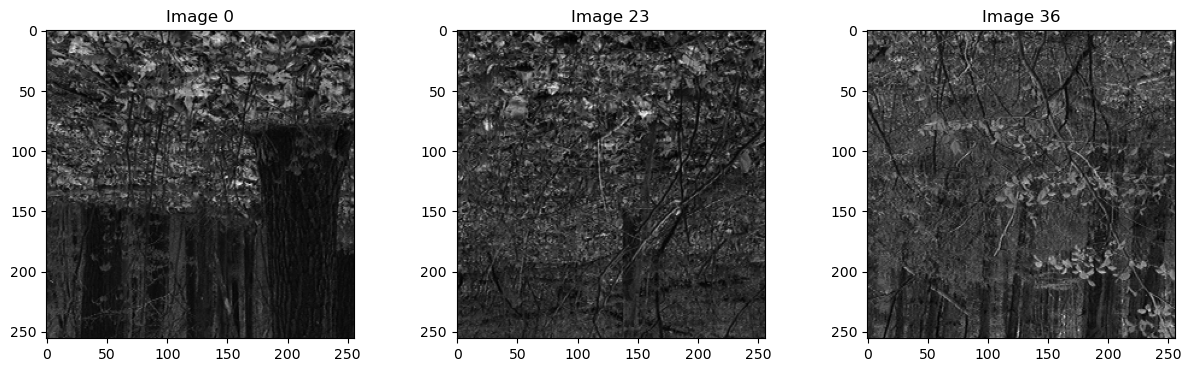

In [200]:
plt.figure(figsize=(imgfigdims))

plt.subplot(131)
image_idx = 0
plt.imshow(ruderman[f'image_{image_idx}'], cmap='gray')
plt.title(f'Image {image_idx}')

plt.subplot(132)
image_idx = 23
plt.imshow(ruderman[f'image_{image_idx}'], cmap='gray')
plt.title(f'Image {image_idx}')

plt.subplot(133)
image_idx = 36
plt.imshow(ruderman[f'image_{image_idx}'], cmap='gray')
plt.title(f'Image {image_idx}')

plt.show()

### Plot some sample image distributions and check what the population distribution looks like

In [177]:
# Find the dimensions of an image
dim = np.loadtxt('ruderman/image_1.txt').shape[0]

# Flatten the arrays to make generating distributions easier
def flatten_images(data):
    flattened = np.zeros((len(ruderman), dim*dim))
    for image in range(len(data)):
        fname = f'image_{image}'
        img = data[fname]
        flattened[image] = img.flatten()
    return flattened

flattened_images = flatten_images(ruderman)
print(flattened_images.shape)

(45, 65536)


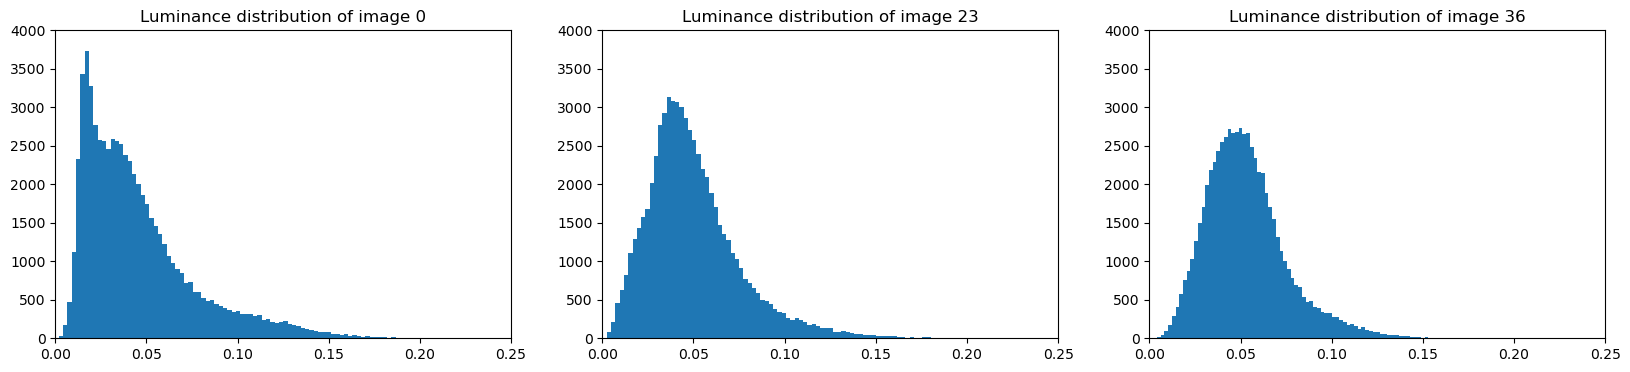

In [225]:
# Plot the luminance distribution of some sample images
plt.figure(figsize=(histfigdims))
xlim = 0, 0.25
ylim = 0,4000

image_idx = 0
plt.subplot(131)
plt.hist(flattened_images[image_idx], bins=100)
plt.title(f'Luminance distribution of image {image_idx}')
plt.xlim(xlim)
plt.ylim(ylim)

image_idx = 23
plt.subplot(132)
plt.hist(flattened_images[image_idx], bins=100)
plt.title(f'Luminance distribution of image {image_idx}')
plt.xlim(xlim)
plt.ylim(ylim)

image_idx = 36
plt.subplot(133)
plt.hist(flattened_images[image_idx], bins=100)
plt.title(f'Luminance distribution of image {image_idx}')
plt.xlim(xlim)
plt.ylim(ylim)

plt.show()

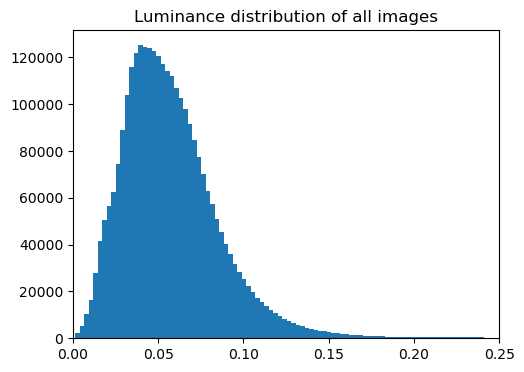

In [202]:
# Plot the luminance distribution of all images
# Group all the log luminances
flattened_full_dataset = flattened_images.flatten()
plt.figure(figsize=(5.5,4))
plt.title('Luminance distribution of all images')
plt.hist(flattened_full_dataset, bins=100)
plt.xlim(xlim)
plt.show()

## For each image, transform it by taking the log of the pixel luminance values, and subtracting the mean value of log luminance across each image.

In [186]:
# Take the log of each image
ruderman_transformed = {}

for image in range(len(ruderman)):
    img_transformed = np.log(ruderman[f'image_{image}'])
    ruderman_transformed[f'image_{image}'] = img_transformed

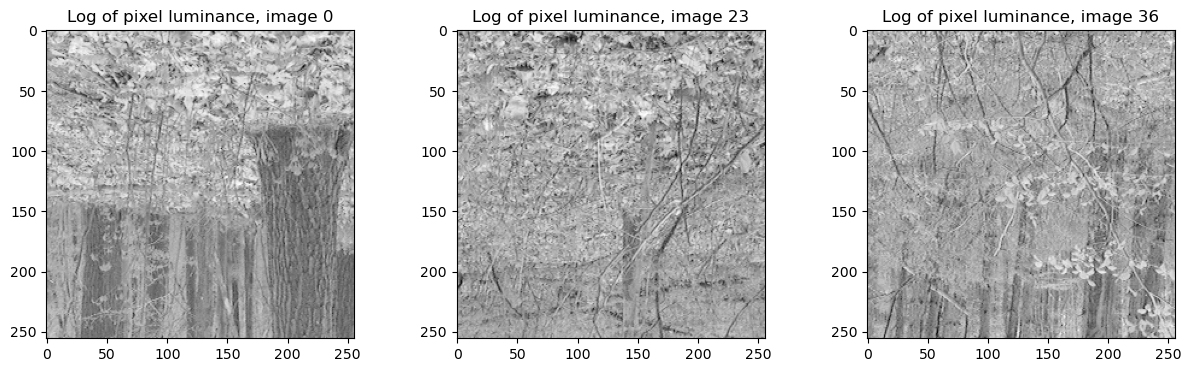

In [203]:
# Plot test images to show how taking the log of luminance affects it
plt.figure(figsize=(imgfigdims))
           
plt.subplot(131)
image_idx = 0
plt.imshow(ruderman_transformed[f'image_{image_idx}'], cmap='gray')
plt.title(f'Log of pixel luminance, image {image_idx}')

plt.subplot(132)
image_idx = 23
plt.imshow(ruderman_transformed[f'image_{image_idx}'], cmap='gray')
plt.title(f'Log of pixel luminance, image {image_idx}')

plt.subplot(133)
image_idx = 36
plt.imshow(ruderman_transformed[f'image_{image_idx}'], cmap='gray')
plt.title(f'Log of pixel luminance, image {image_idx}')

plt.show()

### Visualize the new distributions

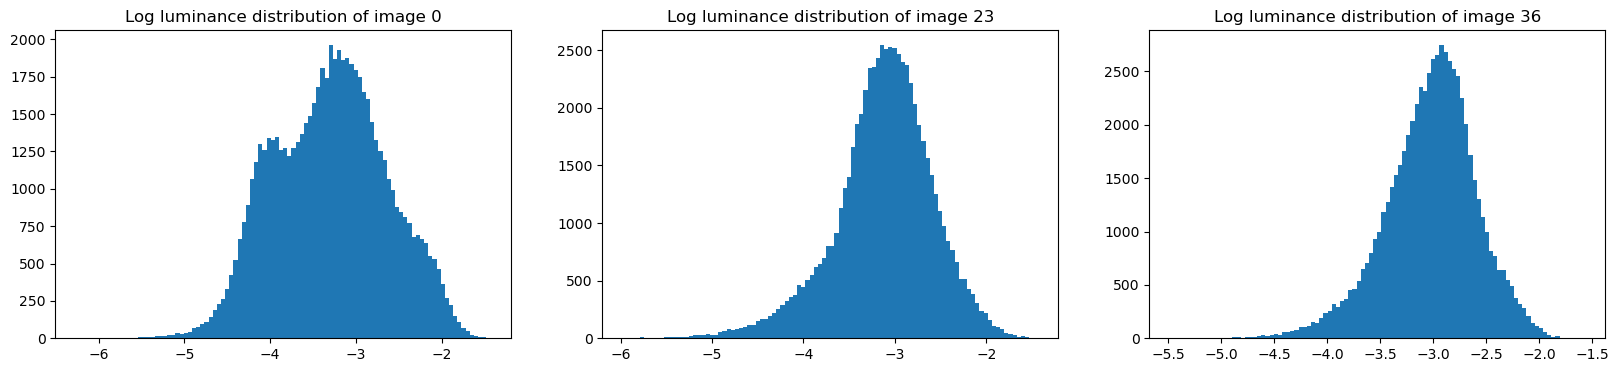

In [204]:
# Flatten log luminance images
flattened_log_images = flatten_images(ruderman_transformed)

plt.figure(figsize=(histfigdims))

plt.subplot(131)
image_idx = 0
plt.hist(flattened_log_images[image_idx], bins=100)
plt.title(f'Log luminance distribution of image {image_idx}')

plt.subplot(132)
image_idx = 23
plt.hist(flattened_log_images[image_idx], bins=100)
plt.title(f'Log luminance distribution of image {image_idx}')

plt.subplot(133)
image_idx = 36
plt.hist(flattened_log_images[image_idx], bins=100)
plt.title(f'Log luminance distribution of image {image_idx}')

plt.show()

### Find the mean log luminance value

In [205]:
# First calculate the mean log luminance for each image
mean_log_luminances = np.zeros(len(ruderman_transformed))
for image in range(len(ruderman_transformed)):
    mean_log_luminances[image] = np.mean(ruderman_transformed[f'image_{image}'])

# Now calculate the mean luminance across all images
mean_log_luminance = np.mean(mean_log_luminances)

### Subtract the mean log luminance value from each image

In [206]:
# Store mean-subtracted log luminance images in a new dict
ruderman_mean_subtracted = {}
for image in range(len(ruderman_transformed)):
    img_mean_subtracted = ruderman_transformed[f'image_{image}'] - mean_log_luminance
    # print(
    ruderman_mean_subtracted[f'image_{image}'] = img_mean_subtracted
    
# Check that test segment (10 elements) has been subtracted by the correct amount
difference_transformed_meansub = ruderman_mean_subtracted['image_0'][0][:10] - ruderman_transformed['image_0'][0][:10]
np.allclose(mean_log_luminance, difference_transformed_meansub, rtol=2)

True

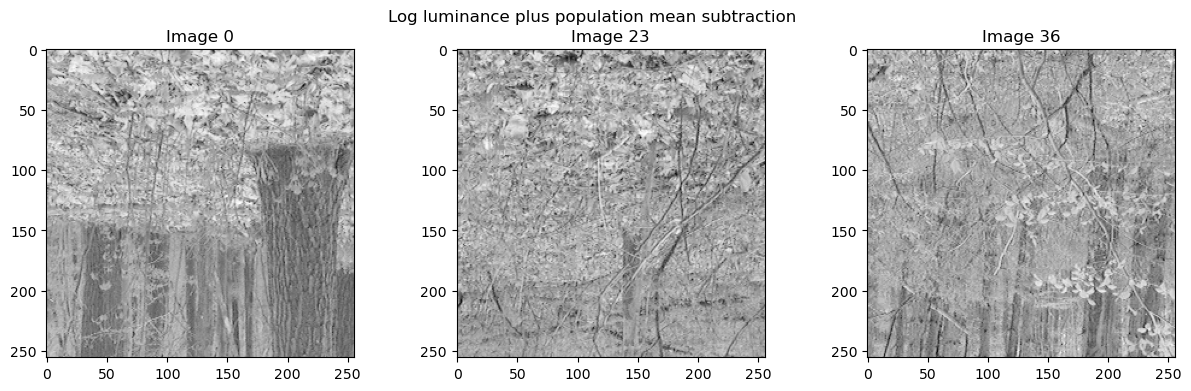

In [214]:
plt.figure(figsize=(imgfigdims))
plt.suptitle('Log luminance plus population mean subtraction')

plt.subplot(131)
image_idx = 0
plt.imshow(ruderman_mean_subtracted[f'image_{image_idx}'], cmap='gray')
plt.title(f'Image {image_idx}')

plt.subplot(132)
image_idx = 23
plt.imshow(ruderman_mean_subtracted[f'image_{image_idx}'], cmap='gray')
plt.title(f'Image {image_idx}')

plt.subplot(133)
image_idx = 36
plt.imshow(ruderman_mean_subtracted[f'image_{image_idx}'], cmap='gray')
plt.title(f'Image {image_idx}')

plt.show()

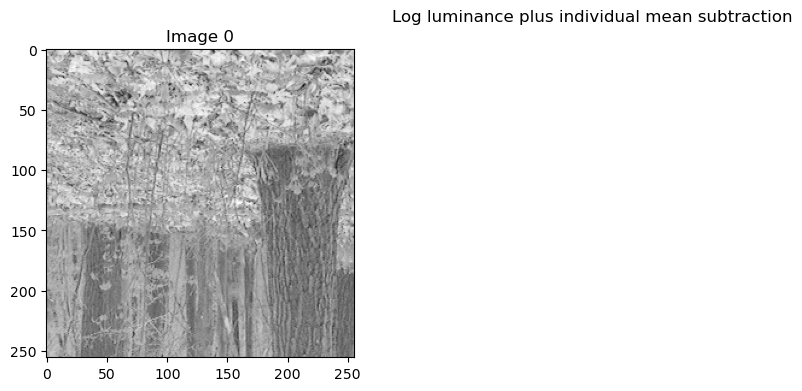

In [215]:
# subtract a single image by its mean log luminance, instead of the population log luminance
plt.figure(figsize=(imgfigdims))
plt.suptitle('Log luminance plus individual mean subtraction')

plt.subplot(131)
image_idx = 0
first_image_mean_subtracted = list(ruderman_transformed.values())[image_idx] - mean_log_luminances[image_idx]
plt.imshow(first_image_mean_subtracted, cmap='gray')
plt.title(f'Image {image_idx}')

plt.show()

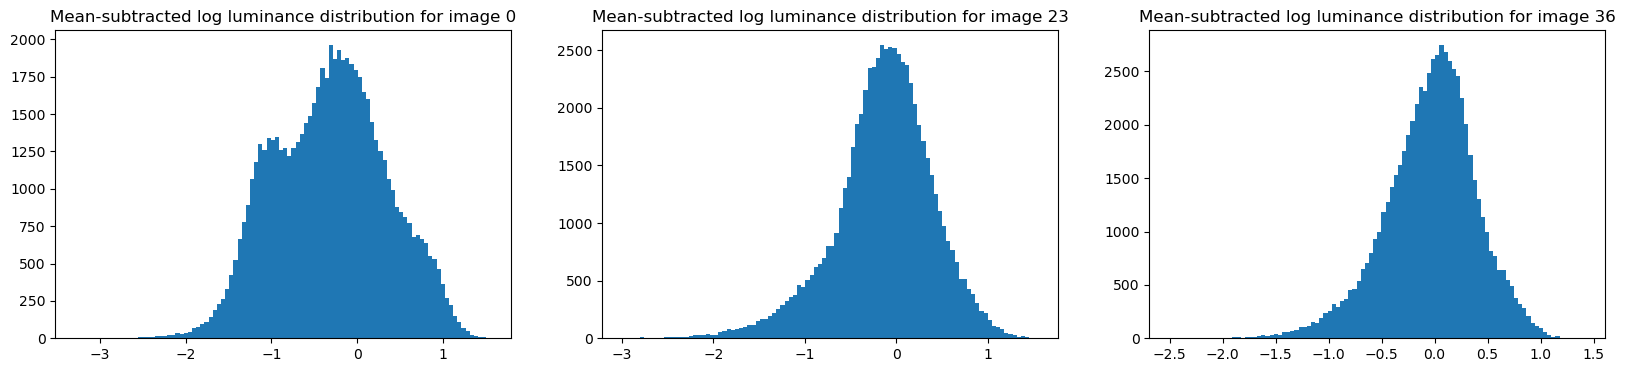

In [216]:
# Plot mean-subtracted log luminance
flattened_mean_subtracted = flatten_images(ruderman_mean_subtracted)

# Plot example images
plt.figure(figsize=(20,4))

plt.subplot(131)
image_idx = 0
plt.hist(flattened_mean_subtracted[image_idx], bins=100)
plt.title(f'Mean-subtracted log luminance distribution for image {image_idx}')

plt.subplot(132)
image_idx = 23
plt.hist(flattened_mean_subtracted[image_idx], bins=100)
plt.title(f'Mean-subtracted log luminance distribution for image {image_idx}')

plt.subplot(133)
image_idx = 36
plt.hist(flattened_mean_subtracted[image_idx], bins=100)
plt.title(f'Mean-subtracted log luminance distribution for image {image_idx}')

plt.show()

## Show the estimate of the error bars on this distribution of mean-subtracted log-luminances, $y$, by thinking about what “independent samples” are in this dataset (you do not need to do a full bootstrap analysis).

I would think that independent samples are 1) individual images or 2) pixels that are a certain distance away from each other on a single image. 

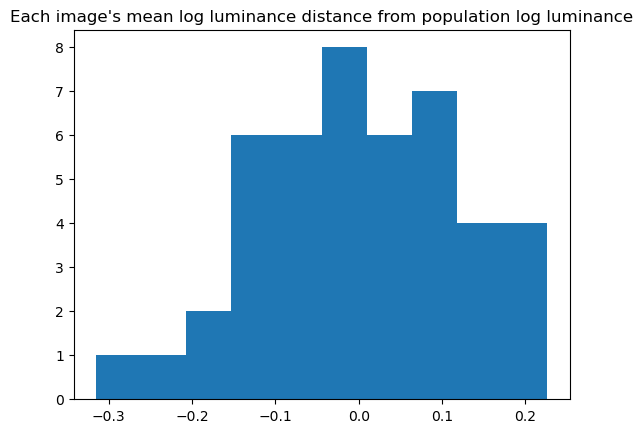

-0.3152624300122526

In [130]:
distance_from_pop_mean = mean_log_luminances - mean_log_luminance
plt.hist(distance_from_pop_mean)
plt.title("Each image's mean log luminance distance from population log luminance")
plt.show()

np.min(distance_from_pop_mean)

## Show that the left and right tails of this distribution are approximately exponential, i.e., $P_+ (y) \propto exp(-\mu_+ |y|)$ and $P_-(y) \propto exp(-\mu_-|y|)$ where P ± stand for the positive (or, respectively, the negative) tails of the log-luminance distribution. Do this by finding the two best-fitting constants, μ + and μ and plotting the tails on top of the normalized distribution for y. A good choice to define the positive and negative tails is to use the threshold of |y| > 1. How you do the fitting (linear regression in log-luminance space, 2 fitting of raw histograms) is up to you, but explain clearly what you did.